## $\textbf{Ajuste para los parámetros cosmológicos  $\Omega_{m}$, $\Omega_{\Lambda}$ y $h_{0}$}. $ 

Los modelos cosmológicos, como todos los modelos estudiados en Física, deben ser comprobados a través de las observaciones. En el caso de la Cosmología, debe ser confrontada con observaciones astronómicas como son las Oscilaciones Acústicas de los Bariones (BAO, por sus siglas en inglés), la Radiación Cósmica de Fondo (CMB por sus siglas en inglés) entre otras. En la actualidad las observaciones son llevadas a cabo por gran parte del espectro electromagnético, las lentes gravitacionales y las mediciones de alta precisión de la CMB. A partir de estas observaciones se pueden obtener varios parámetros cosmológicos como la densidad de materia total $\Omega_{m}$, la densidad de energía oscura $\Omega_{\Lambda}$, la profundidad óptica $\tau$, el índice espectral $n_{s}$ y la contante de Hubble $H_{0}$.

Esta no es la única manera de medir los parámetros de densidad o la constante de Hubble, éstas también se pueden medir a través de la luminosidad de las $\textit{supernovas}$, que son las explociones colosales de las estrellas. La explosión produce varias formas de radiación electromagnética que pueden ser detectadas a grandes distancias. Un tipo de supernovas son las Ia, las cuales son pobres en hidrógeno y tienen un pico en sus curvas de luz, es decir, tienen una luminosidad máxima. Una vez que se sabe en que momento ocurre la explosión, también se puede saber la intensidad de radiación electromagnética que se emite. Con ésto se puede saber la distancia, cuanto más lejos se encuentren, el brillo que llega de ellas es menor. Las observaciones de supernovas distantes poseen una longitud de onda más elongada, lo cual es consistente con un modelo en expansión del Universo. De aquí proviene la primera evidencia experimental importante para la energía oscura. La expansión se ve a través del corrimiento al rojo, ya que, la longitud de onda d la luz que llega de las supernovas se encuentra corrida hacia el rojo con un valor mayor al valor esperado por el corrimiento debido a la expansión no acelerada. 

Para las supernovas, se debe medir la distancia a la cual se encuentran y una manera de medir esta distancia es a través de su luminosidad, para calcularla se hace lo siguiente. La distancia $d_{L}$ se conoce como distancia luminosa, $L_{s}$ es la luminosidad absoluta de alguna fuente y $F$ es el flujo de energía, las cuales se relacionan de la siguiente manera: 

$\begin{equation}
d_{L}^{2}=\dfrac{L_{s}}{4\pi F}.
\end{equation}$

Para un Universo en expansión $L_{s}=L_{0}(1+z)$, donde $L_{0}$ es la luminosidad observada y $z$ es el corrimiento al rojo, la luz viaja a lo largo de la dirección $x$ satisfaciendo la ecuación de la geodésica $ds^{2}=-dt^{2}+a^{2}(t)dx^{2}=0$, donde $a(t)$ es el factor de escala, la energía por unidad de área y por unidad de tiempo observada es entonces $F=\frac{L_{0}}{4\pi (a_{0}x)^2}$, por lo tanto,

$d_{L}=a_{0}(1+z)$,

tomando en cuenta que,

$\begin{equation}
x=\int_{t_{1}}^{t_{0}}\dfrac{dt}{a(t)}=\dfrac{1}{a_{0}H_{0}}\int_{0}^{z}\frac{dz'}{h(z')},
\end{equation}$

donde $h(z)=H(z)/H_{0}$. Ahora, dado que la ecuación de Friedmann se puede escribir como:

$H^{2}(z)=H_{0}^{2}\sum_{i} \Omega_{i}(1+z)^{3(1+\omega_{i})}$.

Así se tiene,

$d_{L}=\dfrac{1+z}{H_{0}} \int_{0}^{z}\frac{dz'}{\sqrt{\sum_{i} \Omega_{i}(1+z)^{3(1+\omega_{i})}}}$.

Además, para la materia total $\omega=0$ y para constante cosmológica $\omega=-1$, suponiendo un Universo con geometría plana $\Omega_{k}=0$. Entonces, como la constante de Hubble tiene unidades de $s^{-1}$, la ecuación de arriba se ha tomado para un valor de la velocidad de la luz como $c=1$, dejando esto de lado, se tiene que 

$d_{L}=\dfrac{(1+z)c}{H_{0}} \int_{0}^{z}\frac{dz'}{\sqrt{ \Omega_{\Lambda}+\Omega_{m}(1+z)^{3}}}$

La evidencia directa de la aceleración actual del Universo se relaciona con la observación de las distancias de luminosidad de las supernovas con alto desplazamiento al rojo. La magnitud $m$ se refiere al brillo observado de alguna estrella así que ésta depende del instrumento con el que se mida. La magnitud absoluta $M$ se refiere al brillo intrínseco de una estrella y se define como la magnitud aparente a una distancia de 10 parsecs (pc) de la estrella, sin embargo, esta es una distancia pequeña en cosmología, por lo que, por convención la magnitud absoluta es medida a $10 Mpc$. Estas magnitudes estan relacionadas con la distancia luminosa a través de la relación siguiente,

$\mu=m-M=5\log_{10}\left(\dfrac{d_{L}}{Mpc}\right)+25$,

con $\mu$ es módulo de distancia.

En el presente trabajo se usarán los datos de "Surpernova Cosmology Project" de "Union2.1 Compilation Magnitude vs. Redshift Table" la cual contiene 5 columnas de datos. En la primer columna viene el nombre de las supernovas, en la segunda el corrimiento al rojo, en la tercera el módulo de distancia y en la cuarta el error del módulo de distancia y hay una columna adicional para la probabilidad de que la supernova haya sido alojada por una galaxia de baja masa, pero esta no se tomará en cuenta. De aquí se podrá ajustar a los parametros $\Omega_{\Lambda}$, $\Omega_{m}$ y a la constante de Hubble que también se escribe en términos de la tasa de expanción $h$ como $H_{0}=100\cdot h \hspace{0.1cm} km\hspace{0.1cm} s^{-1} Mpc^{-1}$.

In [178]:
import scipy.integrate as inte 
import numpy as np 
import math 
from random import uniform
import matplotlib.pyplot as plt
import corner
import emcee
%matplotlib inline

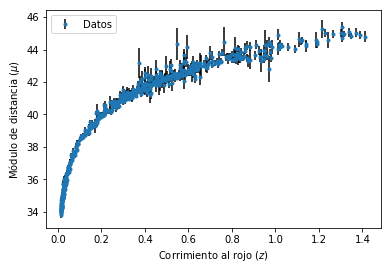

In [90]:
redshifts,modulo,sigma=np.loadtxt('SCPUnion2.1_mu_vs_z.txt',skiprows=5,usecols=(1,2,3),unpack=True) #Aquí se extraen los datos para (z,mu,errores de mu) y se quitan los ultimos 5 datos.
plt.errorbar(redshifts,modulo,sigma,fmt='.',ecolor='black', label=('Datos')) # Se grafican los datos con los errores
plt.xlabel('Corrimiento al rojo $(z)$')
plt.ylabel('Módulo de distancia $(\mu)$')
plt.legend()

In [224]:
def parametros(red,Omega_m,Omega_L): # Aquí se define la función a integrar en la distancia luminosa.
    denom=np.sqrt((Omega_L + Omega_m*(1+red)**3))
    return 1.0/denom

In [225]:
def distancialum(red,h,Omega_m,Omega_L): # Se define la distancia luminosa la cual depende de los tres parámetros a ajustar y se integra sobre el corriiento al rojo (red).
    c=3.0*10**5 #velocidad de la luz en (km/s)
    Ho=100*h # Constante de Hubble en (Km/s/Mpc)
    integral=inte.quad(parametros,0,red,args=(Omega_m,Omega_L))
    distancia=(1+red)*c/Ho*integral[0]
    return distancia

In [226]:
def muteorico(red,h,Omega_m,Omega_L):#Aquí se definie el modelo teórico del módulo de distancia que se comparará con los datos.
    mu=5*np.log10(distancialum(red,h,Omega_m,Omega_L))+25 # mu = m - M
    return mu

En el proyecto se usará la estadística Bayesiana para encontrar los valores más probables de los parámetros ${\Omega_{\Lambda}, \Omega_{m}, h}$. Entonces, del teorema de bayes se tiene que,

$P(\Theta/D)=\dfrac{\mathcal{L}(D/\Theta)P(\Theta)}{P(D)}$,

donde $\Theta$ se refiere a los parámetros y $D$ a los datos. El proposito es máximizar el Postirior $P(\Theta/D)$ y para esto se debe máximizar el Likelihood $\mathcal{L}(D/\Theta)$, el cual se define como:

$\mathcal{L}(D/\Theta)= \dfrac{1}{\sqrt{2\pi \sigma^{2}}}\exp{[-\frac{1}{2}\sum_{i}(\mu_{obs}-\mu_{i})^{2}/\sigma^{2}_{i}]}= \dfrac{1}{\sqrt{2\pi \sigma^{2}}} \exp{[-\frac{1}{2}\chi^{2}]}$.

Comunmente lo que se máximiza el logaritmo natural del postirior, es decir

$\ln(P(\Theta/D))= \ln(\mathcal{L}(D/\Theta)) + \ln(P(\Theta))$,

donde no se ha tomado en cuenta $P(D)$ ya que este no afecta mucho a la maximización.

Así que comenzando con definir la $\chi^{2}$.

In [227]:
def chicuadrada(h,Omega_m,Omega_L): #Se define la función Chi cuadrada.
    N=0.0
    for i in range(0,580):
      chicua = ((modulo[i]-muteorico(redshifts[i],h,Omega_m,Omega_L))**2/(sigma[i]**2))
      N = N + chicua
    return N

Ahora se definiran los priors para los parámetros. Los priors son la información que se tiene de los parámetros.

In [228]:
def lnprior(h,Omega_m,Omega_L): # Aquí se define el logaritmo natural del Prior.
    if ((0.3 < h <0.9) and (0. < Omega_m < 0.6) and (0.3 < Omega_L < 0.9)):
        return 0.
    else:
        return -np.infty
    return

Ahora, definiendo el logaritma natural para el Likelihood.

In [239]:
def lnlike(theta):# Se denifene el logatirmo del likelihood
    h,Omega_m,Omega_L = theta
    loglike = -0.5*(chicuadrada(h,Omega_m,Omega_L) - np.log(2*np.pi*sigma**2)) #
    return loglike

Finalmete se define el logaritmo natural de Postirior.

In [240]:
def lnpostirior(theta,red,mu,sigma):
    lp=lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta,red,mu,sigma)

La maximización se llevará a cabo a través del algoritmo de Metropolis-Hastings el cual es una Cadena de Markov Monte Carlo (MCMC, por sus siglas en inglés).

Así que se comenzará por deninir una función que realice la cadena de Markov para un solo caminador (walker) y después se extenderá a varios caminadores.

Pero priemro se va a calcular el Likelihood de un nuevo punto y luego se va a comparar con el del punto anterior. Si el Likelihood del nuevo punto es mayor que el del punto anterior, entonces se aceptará, lo cual se puede escribir de la sigiente manera:

$ratio = \ln \left[\dfrac{\mathcal{L_{new}}}{\mathcal{L_{old}}}\right]=  \chi^{2}_{old} - \chi^{2}_{new} $

Si ratio $>$ 1, entonces se acepta el nuevo punto y continua con el siguiente.

Si ratio $<$ 0, entonces

si $\exp(ratio) > random(0,1) $ entonces es aceptado.

si $\exp(ratio) < random(0,1) $ entonces se deja el puto anterior (old).

In [313]:
def mcmc(h0,Om0,OL0,ancho_h,ancho_Om,ancho_OL,puntos): # Aquí se define la cadena a través de una función.
    hlist=[] #lista para la tasa de expansión h.
    Omlist=[] #lista para el parámetro de densidad de materia total.
    OLlist=[] #lista para el parámetro de densidad de energía oscura.
    hlist.append(h0) 
    Omlist.append(Om0)
    OLlist.append(OL0)
    aceptados=0
    for a in range(puntos):
        oldh0=hlist[-1]
        oldOm0=Omlist[-1]
        oldOL0=OLlist[-1]
        hnew=np.random.normal(oldh0,ancho_h)
        Omnew=np.random.normal(oldOm0,ancho_Om)
        OLnew=np.random.normal(oldOL0,ancho_OL)
        
#        likenew = lnlike(hnew,Omnew,OLnew)
#        likeold = lnlike(oldh0,oldOm0,oldOL0)
        ratio=chicuadrada(oldh0,oldOm0,oldOL0)-chicuadrada(hnew,Omnew,OLnew)
#    print ("radio=",ratio)
        if ratio > 0:
            hlist.append(hnew)
            Omlist.append(Omnew)
            OLlist.append(OLnew)
            aceptados+=1
        else:
            e=math.exp(ratio)
            ale=np.random.uniform(0.0,1.0)
            if e > ale:
                hlist.append(hnew)
                Omlist.append(Omnew)
                OLlist.append(OLnew)
                aceptados+=1
            else:
                hlist.append(oldh0)
                Omlist.append(oldOm0)
                OLlist.append(oldOL0)
                
    hlist = np.array(hlist)
    Omlist = np.array(Omlist)
    OLlist = np.array(OLlist)
    totales=puntos
    print ("aceptados=",aceptados,"totales=",totales)
    
    plt.figure()
    plt.scatter(hlist, Omlist)
    plt.xlabel('h')
    plt.ylabel('$\Omega_{m}$')
    
    plt.figure()
    plt.scatter(hlist, OLlist)
    plt.xlabel('h')
    plt.ylabel('$\Omega_{\Lambda}$')
    
    plt.figure()
    plt.scatter(Omlist, OLlist)
    plt.xlabel('$\Omega_{m}$')
    plt.ylabel('$\Omega_{\Lambda}$')
    
    plt.figure()
    plt.plot(hlist)
    plt.xlabel('pasos')
    plt.ylabel('$h$')
    
    plt.figure()
    plt.plot(Omlist)
    plt.xlabel('pasos')
    plt.ylabel('$\Omega_{m}$')
    
    plt.figure()
    plt.plot(OLlist)
    plt.xlabel('pasos')
    plt.ylabel('$\Omega_{\Lambda}$')
     
    plt.figure()    
    corner.corner(hlist, labels=['h'])
    corner.corner(Omnuevo, labels=['$\Omega_{m}$'])
    corner.corner(OLnuevo, labels=['$\Omega_{\Lambda}$'])    
    return hlist, Omlist , OLlist

aceptados= 421 totales= 1000
aceptados= 299 totales= 1000
aceptados= 385 totales= 1000


/home/rodrigo/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


aceptados= 422 totales= 1000
aceptados= 405 totales= 1000


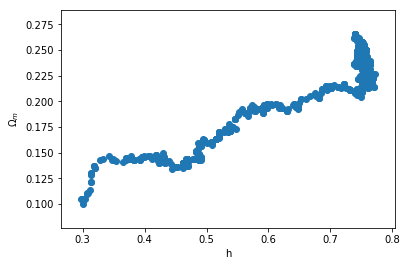

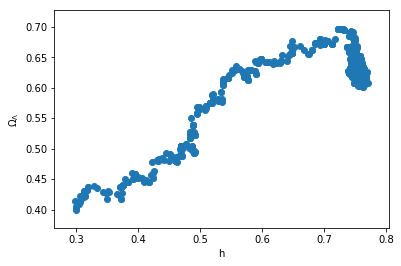

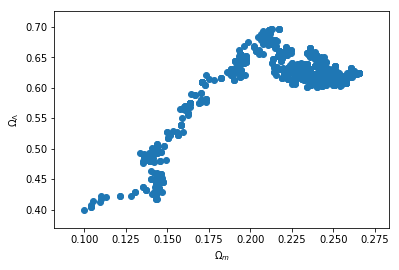

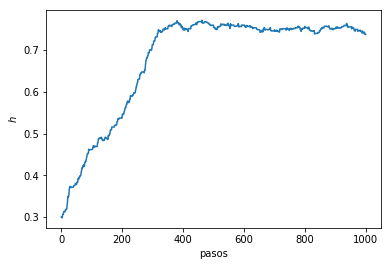

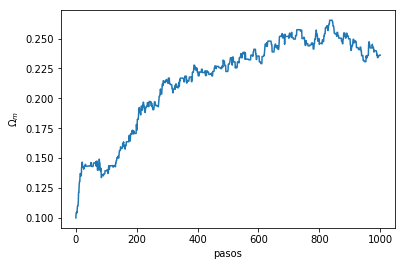

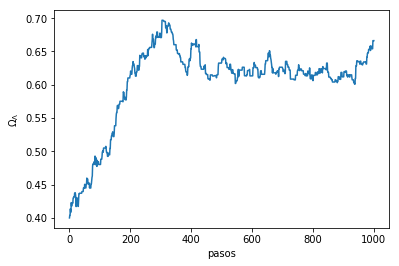

<Figure size 432x288 with 0 Axes>

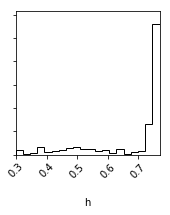

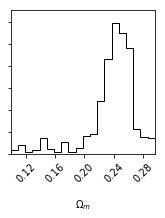

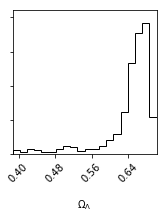

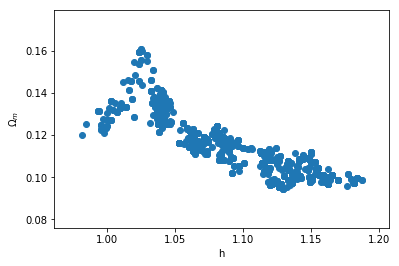

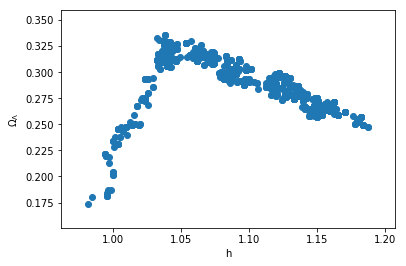

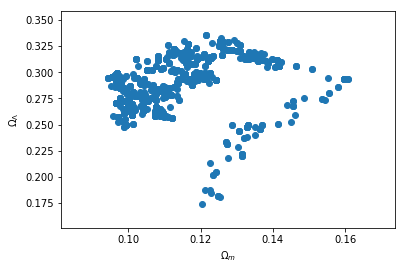

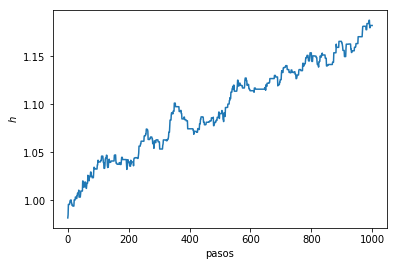

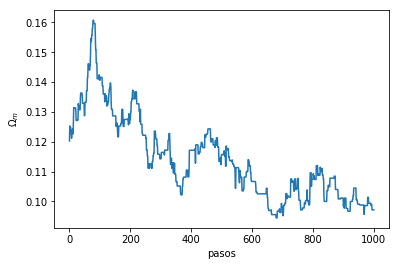

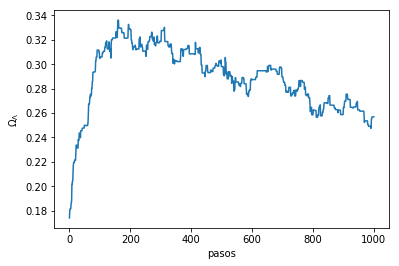

<Figure size 432x288 with 0 Axes>

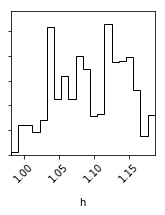

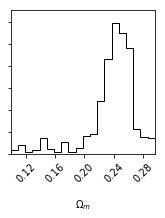

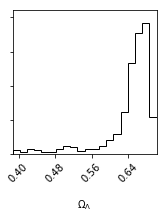

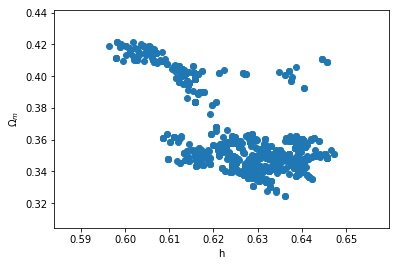

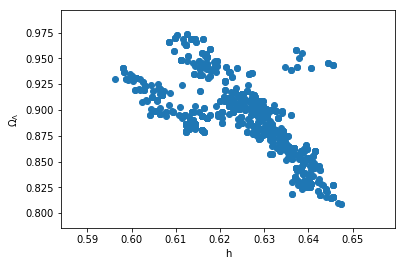

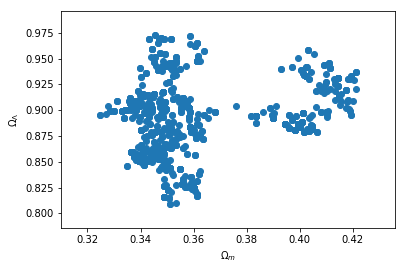

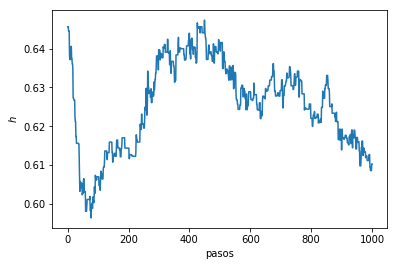

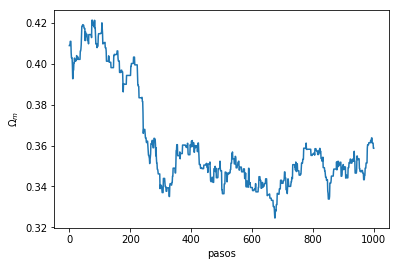

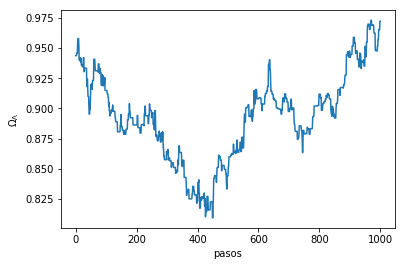

<Figure size 432x288 with 0 Axes>

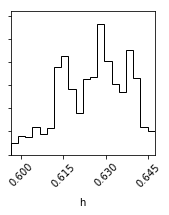

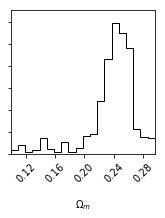

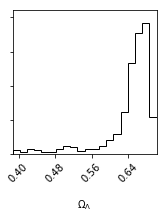

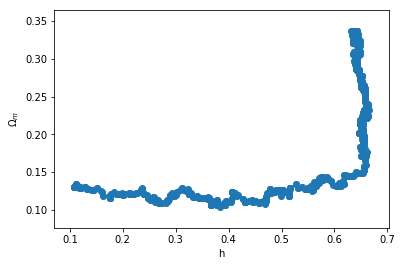

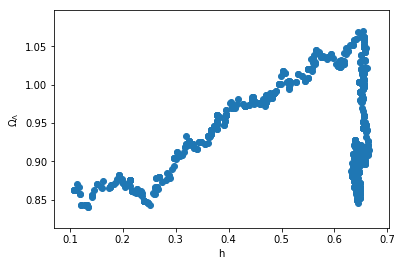

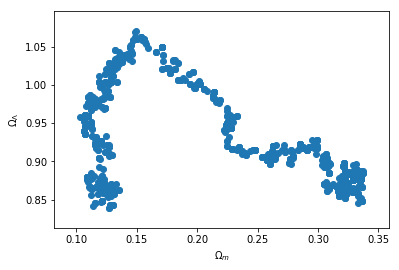

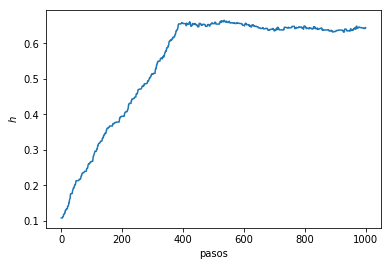

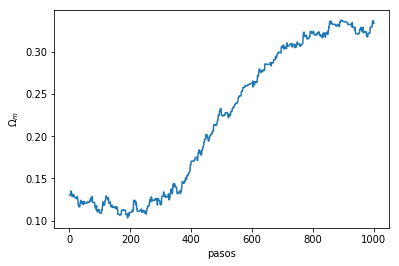

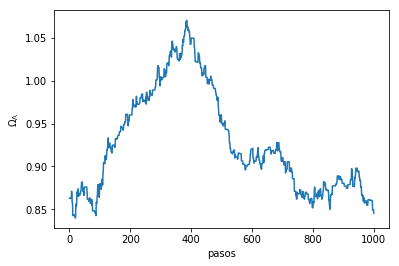

<Figure size 432x288 with 0 Axes>

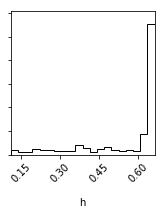

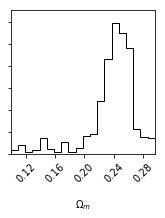

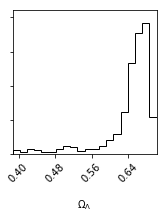

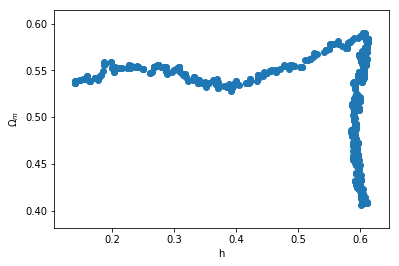

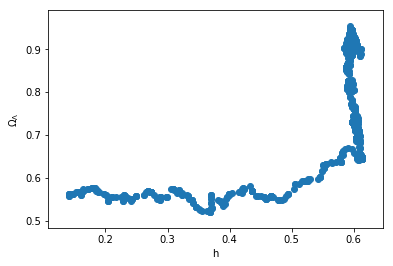

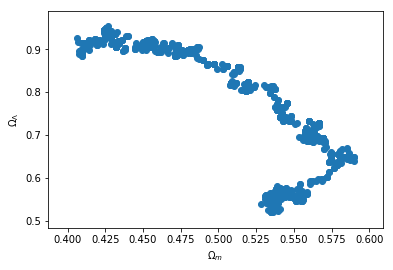

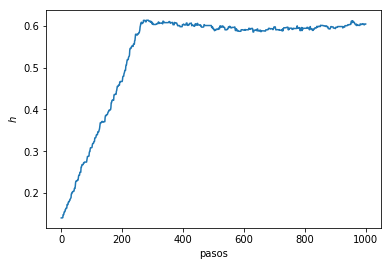

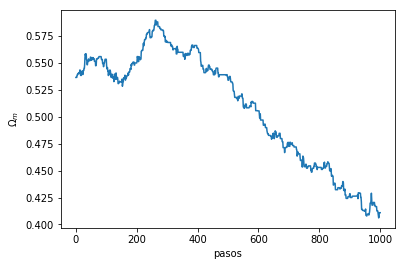

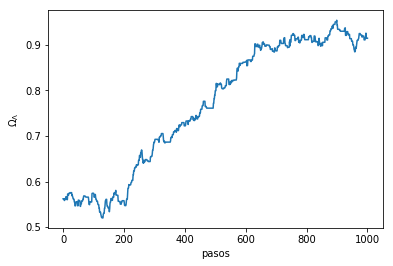

<Figure size 432x288 with 0 Axes>

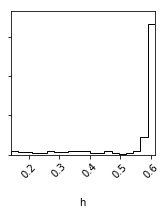

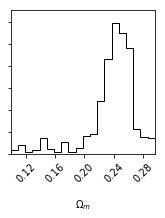

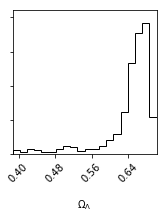

In [314]:
caminadores=5
h0=0.3
Om0=0.1
OL0=0.4

for i in range(caminadores):
    if (i==0):
        hini=h0
        Omini=Om0
        OLini=OL0
    elif (i>=1):
        hini=np.random.uniform(0,1,1)
        Omini=np.random.uniform(0,1,1)
        OLini=np.random.uniform(0,1,1)
    hH, Om, OL = mcmc(hini,Omini,OLini,0.004,0.003,0.006,1000)

 Algo esta ocurriendo en el programa que hace que los parámetros no oscilen alrededor de un valor fijo. Para ver si existe un valor constante para los parámetros cosmológicas se hará una nueva corrida pero ahora para un sólo caminardor.

In [152]:
hnuevo, Omnuevo, OLnuevo = mcmc(0.3,0.1,0.4,0.004,0.003,0.006,3000)

aceptados= 1195 totales= 3000


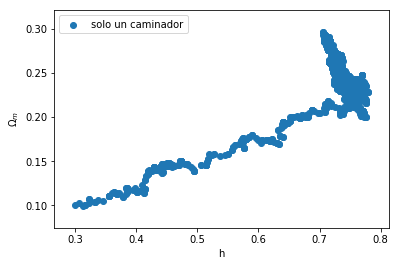

In [161]:
plt.scatter(hnuevo, Omnuevo, label = 'solo un caminador')
plt.xlabel('h')
plt.ylabel('$\Omega_{m}$')
plt.legend()

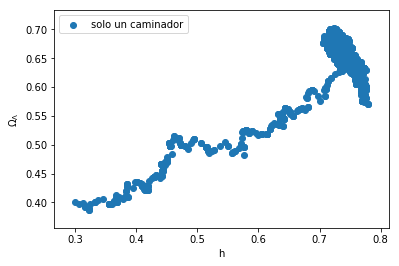

In [163]:
plt.scatter(hnuevo, OLnuevo,label = 'solo un caminador')
plt.xlabel('h')
plt.ylabel('$\Omega_{\Lambda}$')
plt.legend()

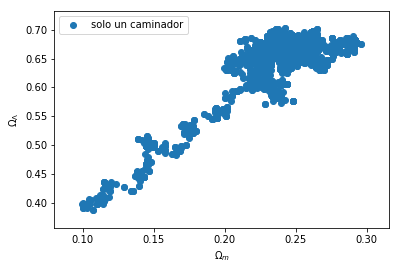

In [164]:
plt.scatter(Omnuevo, OLnuevo,label = 'solo un caminador')
plt.xlabel('$\Omega_{m}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.legend()

Text(0,0.5,'h')

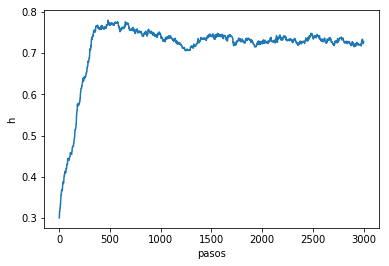

In [156]:
plt.plot(hnuevo)
plt.xlabel('pasos')
plt.ylabel('h')

Text(0,0.5,'$\\Omega_{m}$')

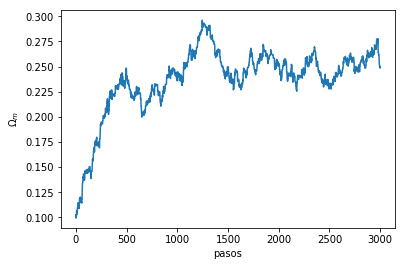

In [157]:
plt.plot(Omnuevo)
plt.xlabel('pasos')
plt.ylabel('$\Omega_{m}$')

Text(0,0.5,'$\\Omega_{\\Lambda}$')

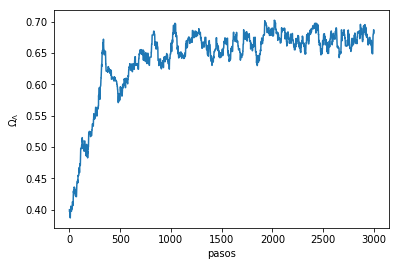

In [159]:
plt.plot(OLnuevo)
plt.xlabel('pasos')
plt.ylabel('$\Omega_{\Lambda}$')

Al haber hecho para un solo caminador se observa que los parámetros si oscilan en algun valor. Por ejemplo, para la tasa de expansión se tiene $h=0.72$, para la densidad de materia $\Omega_{m}=0.25$ y para la densidad de energía oscura $\Omega_{m}=0.66$, aproximadamente. 

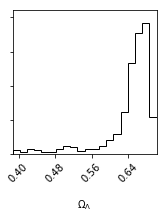

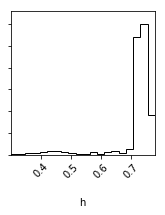

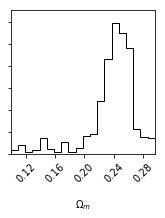

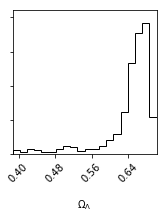

In [315]:
corner.corner(hnuevo, labels=['h'])
corner.corner(Omnuevo, labels=['$\Omega_{m}$'])
corner.corner(OLnuevo, labels=['$\Omega_{\Lambda}$'])